In [1]:
#!pip install ipython-autotime
# !pip install -U scikit-learn
%load_ext autotime

time: 0 ns (started: 2021-01-23 18:16:30 +01:00)


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

time: 0 ns (started: 2021-01-23 18:16:30 +01:00)


In [3]:
# !pwd
# import os
# os.chdir('/content/drive/My Drive/ML/ml-project-master/src/')
# !pwd

time: 0 ns (started: 2021-01-23 18:16:30 +01:00)


In [4]:
import os

os.chdir('../../')
os.getcwd()

'C:\\Users\\Luca\\Desktop\\Elle\\University\\0-UNIPI\\ML-Machine Learning\\Workspace\\ml-project'

time: 15 ms (started: 2021-01-23 18:16:30 +01:00)


In [5]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

from src.utility import *

time: 3.06 s (started: 2021-01-23 18:16:30 +01:00)


In [6]:
import keras.backend as K


def euclidean_distance_loss(y_true, y_pred):
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

time: 32 ms (started: 2021-01-23 18:16:33 +01:00)


# Import Dataset

In [7]:
def load_cup():
    ml_cup = np.delete(np.genfromtxt('cup/ML-CUP20-TR.csv', 
                                     delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_cup_blind():
    return np.delete(np.genfromtxt('cup/ML-CUP20-TS.csv',
                                   delimiter=','), obj=0, axis=1)
    
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=1))

time: 0 ns (started: 2021-01-23 18:16:33 +01:00)


In [8]:
X, y = load_cup()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

time: 15 ms (started: 2021-01-23 18:16:33 +01:00)


In [9]:
print(X.shape)
print(y.shape)

(1524, 10)
(1524, 2)
time: 0 ns (started: 2021-01-23 18:16:33 +01:00)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L2

# Function to create model, required for KerasRegressor
def create_model(learn_rate=0.01, momentum=0.9, neurons_layer_1=130,
                 init_mode='uniform', activation='sigmoid',  weight_decay = 0.00001,
                 nesterov = True, neurons_layer_2 = 30):
  # create model
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(10)))
    model.add(Dense(neurons_layer_1, activation=activation,
                    kernel_initializer=init_mode, kernel_regularizer= L2(weight_decay)))
    model.add(Dense(neurons_layer_2, activation=activation,
                    kernel_initializer=init_mode, kernel_regularizer= L2(weight_decay)))
    model.add(Dense(2))
    optimizer = SGD(
      learning_rate=learn_rate, momentum=momentum, nesterov=nesterov)
    # Compile model
    model.compile(optimizer=optimizer,
              loss=euclidean_distance_loss)
    return model

time: 0 ns (started: 2021-01-23 18:16:33 +01:00)


In [11]:
import time
begin = time.time()

evaluation = []
for i in range(0,10):
    model = create_model(momentum=0.8)
    history = model.fit(X_train, y_train,
                      batch_size=128,
                      epochs= 1000,
                      verbose=2)
    error = mean_euclidean_error(model.predict(X_val), y_val)
    evaluation.append(error)

end = time.time()
print(str(begin-end) + ' Seconds')

Epoch 1/1000
11/11 - 0s - loss: 55.0079
Epoch 2/1000
11/11 - 0s - loss: 48.3354
Epoch 3/1000
11/11 - 0s - loss: 38.1705
Epoch 4/1000
11/11 - 0s - loss: 27.1125
Epoch 5/1000
11/11 - 0s - loss: 20.3693
Epoch 6/1000
11/11 - 0s - loss: 17.9789
Epoch 7/1000
11/11 - 0s - loss: 17.0432
Epoch 8/1000
11/11 - 0s - loss: 16.7081
Epoch 9/1000
11/11 - 0s - loss: 16.5417
Epoch 10/1000
11/11 - 0s - loss: 16.4357
Epoch 11/1000
11/11 - 0s - loss: 16.2917
Epoch 12/1000
11/11 - 0s - loss: 16.1012
Epoch 13/1000
11/11 - 0s - loss: 15.8008
Epoch 14/1000
11/11 - 0s - loss: 15.3064
Epoch 15/1000
11/11 - 0s - loss: 14.5425
Epoch 16/1000
11/11 - 0s - loss: 13.5923
Epoch 17/1000
11/11 - 0s - loss: 12.5892
Epoch 18/1000
11/11 - 0s - loss: 11.5832
Epoch 19/1000
11/11 - 0s - loss: 10.6207
Epoch 20/1000
11/11 - 0s - loss: 9.7782
Epoch 21/1000
11/11 - 0s - loss: 9.1563
Epoch 22/1000
11/11 - 0s - loss: 8.7887
Epoch 23/1000
11/11 - 0s - loss: 8.6210
Epoch 24/1000
11/11 - 0s - loss: 8.5459
Epoch 25/1000
11/11 - 0s - los

Epoch 203/1000
11/11 - 0s - loss: 3.1570
Epoch 204/1000
11/11 - 0s - loss: 3.1484
Epoch 205/1000
11/11 - 0s - loss: 3.1366
Epoch 206/1000
11/11 - 0s - loss: 3.1358
Epoch 207/1000
11/11 - 0s - loss: 3.1422
Epoch 208/1000
11/11 - 0s - loss: 3.1325
Epoch 209/1000
11/11 - 0s - loss: 3.1254
Epoch 210/1000
11/11 - 0s - loss: 3.1274
Epoch 211/1000
11/11 - 0s - loss: 3.1183
Epoch 212/1000
11/11 - 0s - loss: 3.1214
Epoch 213/1000
11/11 - 0s - loss: 3.1301
Epoch 214/1000
11/11 - 0s - loss: 3.1078
Epoch 215/1000
11/11 - 0s - loss: 3.1229
Epoch 216/1000
11/11 - 0s - loss: 3.1024
Epoch 217/1000
11/11 - 0s - loss: 3.1077
Epoch 218/1000
11/11 - 0s - loss: 3.0988
Epoch 219/1000
11/11 - 0s - loss: 3.0978
Epoch 220/1000
11/11 - 0s - loss: 3.1019
Epoch 221/1000
11/11 - 0s - loss: 3.1136
Epoch 222/1000
11/11 - 0s - loss: 3.0964
Epoch 223/1000
11/11 - 0s - loss: 3.0916
Epoch 224/1000
11/11 - 0s - loss: 3.0771
Epoch 225/1000
11/11 - 0s - loss: 3.0845
Epoch 226/1000
11/11 - 0s - loss: 3.0854
Epoch 227/1000
1

Epoch 403/1000
11/11 - 0s - loss: 2.8660
Epoch 404/1000
11/11 - 0s - loss: 2.8716
Epoch 405/1000
11/11 - 0s - loss: 2.8674
Epoch 406/1000
11/11 - 0s - loss: 2.8569
Epoch 407/1000
11/11 - 0s - loss: 2.8614
Epoch 408/1000
11/11 - 0s - loss: 2.8840
Epoch 409/1000
11/11 - 0s - loss: 2.8535
Epoch 410/1000
11/11 - 0s - loss: 2.8526
Epoch 411/1000
11/11 - 0s - loss: 2.8619
Epoch 412/1000
11/11 - 0s - loss: 2.8680
Epoch 413/1000
11/11 - 0s - loss: 2.8531
Epoch 414/1000
11/11 - 0s - loss: 2.8521
Epoch 415/1000
11/11 - 0s - loss: 2.8621
Epoch 416/1000
11/11 - 0s - loss: 2.8700
Epoch 417/1000
11/11 - 0s - loss: 2.8551
Epoch 418/1000
11/11 - 0s - loss: 2.8711
Epoch 419/1000
11/11 - 0s - loss: 2.8641
Epoch 420/1000
11/11 - 0s - loss: 2.8594
Epoch 421/1000
11/11 - 0s - loss: 2.8625
Epoch 422/1000
11/11 - 0s - loss: 2.8519
Epoch 423/1000
11/11 - 0s - loss: 2.8528
Epoch 424/1000
11/11 - 0s - loss: 2.8611
Epoch 425/1000
11/11 - 0s - loss: 2.8536
Epoch 426/1000
11/11 - 0s - loss: 2.8573
Epoch 427/1000
1

Epoch 603/1000
11/11 - 0s - loss: 2.7515
Epoch 604/1000
11/11 - 0s - loss: 2.7503
Epoch 605/1000
11/11 - 0s - loss: 2.7423
Epoch 606/1000
11/11 - 0s - loss: 2.7662
Epoch 607/1000
11/11 - 0s - loss: 2.7394
Epoch 608/1000
11/11 - 0s - loss: 2.7522
Epoch 609/1000
11/11 - 0s - loss: 2.7448
Epoch 610/1000
11/11 - 0s - loss: 2.7515
Epoch 611/1000
11/11 - 0s - loss: 2.7376
Epoch 612/1000
11/11 - 0s - loss: 2.7376
Epoch 613/1000
11/11 - 0s - loss: 2.7374
Epoch 614/1000
11/11 - 0s - loss: 2.7397
Epoch 615/1000
11/11 - 0s - loss: 2.7357
Epoch 616/1000
11/11 - 0s - loss: 2.7372
Epoch 617/1000
11/11 - 0s - loss: 2.7480
Epoch 618/1000
11/11 - 0s - loss: 2.7402
Epoch 619/1000
11/11 - 0s - loss: 2.7390
Epoch 620/1000
11/11 - 0s - loss: 2.7404
Epoch 621/1000
11/11 - 0s - loss: 2.7281
Epoch 622/1000
11/11 - 0s - loss: 2.7394
Epoch 623/1000
11/11 - 0s - loss: 2.7334
Epoch 624/1000
11/11 - 0s - loss: 2.7333
Epoch 625/1000
11/11 - 0s - loss: 2.7399
Epoch 626/1000
11/11 - 0s - loss: 2.7353
Epoch 627/1000
1

Epoch 803/1000
11/11 - 0s - loss: 2.6505
Epoch 804/1000
11/11 - 0s - loss: 2.6496
Epoch 805/1000
11/11 - 0s - loss: 2.6466
Epoch 806/1000
11/11 - 0s - loss: 2.6577
Epoch 807/1000
11/11 - 0s - loss: 2.6518
Epoch 808/1000
11/11 - 0s - loss: 2.6696
Epoch 809/1000
11/11 - 0s - loss: 2.6512
Epoch 810/1000
11/11 - 0s - loss: 2.6472
Epoch 811/1000
11/11 - 0s - loss: 2.6397
Epoch 812/1000
11/11 - 0s - loss: 2.6422
Epoch 813/1000
11/11 - 0s - loss: 2.6414
Epoch 814/1000
11/11 - 0s - loss: 2.6556
Epoch 815/1000
11/11 - 0s - loss: 2.6353
Epoch 816/1000
11/11 - 0s - loss: 2.6506
Epoch 817/1000
11/11 - 0s - loss: 2.6524
Epoch 818/1000
11/11 - 0s - loss: 2.6478
Epoch 819/1000
11/11 - 0s - loss: 2.6432
Epoch 820/1000
11/11 - 0s - loss: 2.6462
Epoch 821/1000
11/11 - 0s - loss: 2.6535
Epoch 822/1000
11/11 - 0s - loss: 2.6499
Epoch 823/1000
11/11 - 0s - loss: 2.6379
Epoch 824/1000
11/11 - 0s - loss: 2.6460
Epoch 825/1000
11/11 - 0s - loss: 2.6438
Epoch 826/1000
11/11 - 0s - loss: 2.6488
Epoch 827/1000
1

Epoch 3/1000
11/11 - 0s - loss: 34.8252
Epoch 4/1000
11/11 - 0s - loss: 24.2967
Epoch 5/1000
11/11 - 0s - loss: 19.2431
Epoch 6/1000
11/11 - 0s - loss: 17.4754
Epoch 7/1000
11/11 - 0s - loss: 16.8515
Epoch 8/1000
11/11 - 0s - loss: 16.6085
Epoch 9/1000
11/11 - 0s - loss: 16.4733
Epoch 10/1000
11/11 - 0s - loss: 16.3463
Epoch 11/1000
11/11 - 0s - loss: 16.1785
Epoch 12/1000
11/11 - 0s - loss: 15.9252
Epoch 13/1000
11/11 - 0s - loss: 15.5221
Epoch 14/1000
11/11 - 0s - loss: 14.8737
Epoch 15/1000
11/11 - 0s - loss: 13.9911
Epoch 16/1000
11/11 - 0s - loss: 12.9740
Epoch 17/1000
11/11 - 0s - loss: 11.9511
Epoch 18/1000
11/11 - 0s - loss: 10.9511
Epoch 19/1000
11/11 - 0s - loss: 10.0321
Epoch 20/1000
11/11 - 0s - loss: 9.3103
Epoch 21/1000
11/11 - 0s - loss: 8.8463
Epoch 22/1000
11/11 - 0s - loss: 8.6341
Epoch 23/1000
11/11 - 0s - loss: 8.5478
Epoch 24/1000
11/11 - 0s - loss: 8.4987
Epoch 25/1000
11/11 - 0s - loss: 8.4707
Epoch 26/1000
11/11 - 0s - loss: 8.4481
Epoch 27/1000
11/11 - 0s - los

Epoch 205/1000
11/11 - 0s - loss: 3.1655
Epoch 206/1000
11/11 - 0s - loss: 3.1644
Epoch 207/1000
11/11 - 0s - loss: 3.1684
Epoch 208/1000
11/11 - 0s - loss: 3.1596
Epoch 209/1000
11/11 - 0s - loss: 3.1619
Epoch 210/1000
11/11 - 0s - loss: 3.1702
Epoch 211/1000
11/11 - 0s - loss: 3.1449
Epoch 212/1000
11/11 - 0s - loss: 3.1666
Epoch 213/1000
11/11 - 0s - loss: 3.1443
Epoch 214/1000
11/11 - 0s - loss: 3.1530
Epoch 215/1000
11/11 - 0s - loss: 3.1393
Epoch 216/1000
11/11 - 0s - loss: 3.1470
Epoch 217/1000
11/11 - 0s - loss: 3.1522
Epoch 218/1000
11/11 - 0s - loss: 3.1370
Epoch 219/1000
11/11 - 0s - loss: 3.1263
Epoch 220/1000
11/11 - 0s - loss: 3.1278
Epoch 221/1000
11/11 - 0s - loss: 3.1281
Epoch 222/1000
11/11 - 0s - loss: 3.1447
Epoch 223/1000
11/11 - 0s - loss: 3.1389
Epoch 224/1000
11/11 - 0s - loss: 3.1275
Epoch 225/1000
11/11 - 0s - loss: 3.1272
Epoch 226/1000
11/11 - 0s - loss: 3.1156
Epoch 227/1000
11/11 - 0s - loss: 3.1260
Epoch 228/1000
11/11 - 0s - loss: 3.1142
Epoch 229/1000
1

Epoch 405/1000
11/11 - 0s - loss: 2.8620
Epoch 406/1000
11/11 - 0s - loss: 2.8671
Epoch 407/1000
11/11 - 0s - loss: 2.8750
Epoch 408/1000
11/11 - 0s - loss: 2.8616
Epoch 409/1000
11/11 - 0s - loss: 2.8714
Epoch 410/1000
11/11 - 0s - loss: 2.8815
Epoch 411/1000
11/11 - 0s - loss: 2.8603
Epoch 412/1000
11/11 - 0s - loss: 2.8600
Epoch 413/1000
11/11 - 0s - loss: 2.8553
Epoch 414/1000
11/11 - 0s - loss: 2.8715
Epoch 415/1000
11/11 - 0s - loss: 2.8541
Epoch 416/1000
11/11 - 0s - loss: 2.8494
Epoch 417/1000
11/11 - 0s - loss: 2.8493
Epoch 418/1000
11/11 - 0s - loss: 2.8649
Epoch 419/1000
11/11 - 0s - loss: 2.8635
Epoch 420/1000
11/11 - 0s - loss: 2.8518
Epoch 421/1000
11/11 - 0s - loss: 2.8501
Epoch 422/1000
11/11 - 0s - loss: 2.8780
Epoch 423/1000
11/11 - 0s - loss: 2.8562
Epoch 424/1000
11/11 - 0s - loss: 2.8491
Epoch 425/1000
11/11 - 0s - loss: 2.8454
Epoch 426/1000
11/11 - 0s - loss: 2.8477
Epoch 427/1000
11/11 - 0s - loss: 2.8461
Epoch 428/1000
11/11 - 0s - loss: 2.8434
Epoch 429/1000
1

Epoch 605/1000
11/11 - 0s - loss: 2.7367
Epoch 606/1000
11/11 - 0s - loss: 2.7470
Epoch 607/1000
11/11 - 0s - loss: 2.7373
Epoch 608/1000
11/11 - 0s - loss: 2.7280
Epoch 609/1000
11/11 - 0s - loss: 2.7295
Epoch 610/1000
11/11 - 0s - loss: 2.7478
Epoch 611/1000
11/11 - 0s - loss: 2.7313
Epoch 612/1000
11/11 - 0s - loss: 2.7425
Epoch 613/1000
11/11 - 0s - loss: 2.7381
Epoch 614/1000
11/11 - 0s - loss: 2.7406
Epoch 615/1000
11/11 - 0s - loss: 2.7244
Epoch 616/1000
11/11 - 0s - loss: 2.7370
Epoch 617/1000
11/11 - 0s - loss: 2.7408
Epoch 618/1000
11/11 - 0s - loss: 2.7346
Epoch 619/1000
11/11 - 0s - loss: 2.7406
Epoch 620/1000
11/11 - 0s - loss: 2.7314
Epoch 621/1000
11/11 - 0s - loss: 2.7268
Epoch 622/1000
11/11 - 0s - loss: 2.7307
Epoch 623/1000
11/11 - 0s - loss: 2.7181
Epoch 624/1000
11/11 - 0s - loss: 2.7184
Epoch 625/1000
11/11 - 0s - loss: 2.7231
Epoch 626/1000
11/11 - 0s - loss: 2.7270
Epoch 627/1000
11/11 - 0s - loss: 2.7245
Epoch 628/1000
11/11 - 0s - loss: 2.7260
Epoch 629/1000
1

Epoch 805/1000
11/11 - 0s - loss: 2.6431
Epoch 806/1000
11/11 - 0s - loss: 2.6601
Epoch 807/1000
11/11 - 0s - loss: 2.6447
Epoch 808/1000
11/11 - 0s - loss: 2.6536
Epoch 809/1000
11/11 - 0s - loss: 2.6454
Epoch 810/1000
11/11 - 0s - loss: 2.6517
Epoch 811/1000
11/11 - 0s - loss: 2.6478
Epoch 812/1000
11/11 - 0s - loss: 2.6413
Epoch 813/1000
11/11 - 0s - loss: 2.6508
Epoch 814/1000
11/11 - 0s - loss: 2.6526
Epoch 815/1000
11/11 - 0s - loss: 2.6438
Epoch 816/1000
11/11 - 0s - loss: 2.6403
Epoch 817/1000
11/11 - 0s - loss: 2.6394
Epoch 818/1000
11/11 - 0s - loss: 2.6499
Epoch 819/1000
11/11 - 0s - loss: 2.6423
Epoch 820/1000
11/11 - 0s - loss: 2.6567
Epoch 821/1000
11/11 - 0s - loss: 2.6411
Epoch 822/1000
11/11 - 0s - loss: 2.6494
Epoch 823/1000
11/11 - 0s - loss: 2.6659
Epoch 824/1000
11/11 - 0s - loss: 2.6424
Epoch 825/1000
11/11 - 0s - loss: 2.6519
Epoch 826/1000
11/11 - 0s - loss: 2.6483
Epoch 827/1000
11/11 - 0s - loss: 2.6472
Epoch 828/1000
11/11 - 0s - loss: 2.6483
Epoch 829/1000
1

Epoch 5/1000
11/11 - 0s - loss: 21.4442
Epoch 6/1000
11/11 - 0s - loss: 18.5650
Epoch 7/1000
11/11 - 0s - loss: 17.3375
Epoch 8/1000
11/11 - 0s - loss: 16.8653
Epoch 9/1000
11/11 - 0s - loss: 16.6567
Epoch 10/1000
11/11 - 0s - loss: 16.5533
Epoch 11/1000
11/11 - 0s - loss: 16.4581
Epoch 12/1000
11/11 - 0s - loss: 16.3490
Epoch 13/1000
11/11 - 0s - loss: 16.1935
Epoch 14/1000
11/11 - 0s - loss: 15.9441
Epoch 15/1000
11/11 - 0s - loss: 15.5334
Epoch 16/1000
11/11 - 0s - loss: 14.8655
Epoch 17/1000
11/11 - 0s - loss: 13.9334
Epoch 18/1000
11/11 - 0s - loss: 12.8764
Epoch 19/1000
11/11 - 0s - loss: 11.7767
Epoch 20/1000
11/11 - 0s - loss: 10.6650
Epoch 21/1000
11/11 - 0s - loss: 9.6780
Epoch 22/1000
11/11 - 0s - loss: 8.9797
Epoch 23/1000
11/11 - 0s - loss: 8.6655
Epoch 24/1000
11/11 - 0s - loss: 8.5460
Epoch 25/1000
11/11 - 0s - loss: 8.4969
Epoch 26/1000
11/11 - 0s - loss: 8.4653
Epoch 27/1000
11/11 - 0s - loss: 8.4321
Epoch 28/1000
11/11 - 0s - loss: 8.4148
Epoch 29/1000
11/11 - 0s - lo

Epoch 207/1000
11/11 - 0s - loss: 3.1364
Epoch 208/1000
11/11 - 0s - loss: 3.1381
Epoch 209/1000
11/11 - 0s - loss: 3.1264
Epoch 210/1000
11/11 - 0s - loss: 3.1353
Epoch 211/1000
11/11 - 0s - loss: 3.1258
Epoch 212/1000
11/11 - 0s - loss: 3.1297
Epoch 213/1000
11/11 - 0s - loss: 3.1097
Epoch 214/1000
11/11 - 0s - loss: 3.1189
Epoch 215/1000
11/11 - 0s - loss: 3.1158
Epoch 216/1000
11/11 - 0s - loss: 3.1105
Epoch 217/1000
11/11 - 0s - loss: 3.1152
Epoch 218/1000
11/11 - 0s - loss: 3.1108
Epoch 219/1000
11/11 - 0s - loss: 3.1085
Epoch 220/1000
11/11 - 0s - loss: 3.1017
Epoch 221/1000
11/11 - 0s - loss: 3.0928
Epoch 222/1000
11/11 - 0s - loss: 3.0986
Epoch 223/1000
11/11 - 0s - loss: 3.1112
Epoch 224/1000
11/11 - 0s - loss: 3.0872
Epoch 225/1000
11/11 - 0s - loss: 3.1124
Epoch 226/1000
11/11 - 0s - loss: 3.0809
Epoch 227/1000
11/11 - 0s - loss: 3.0865
Epoch 228/1000
11/11 - 0s - loss: 3.0817
Epoch 229/1000
11/11 - 0s - loss: 3.0801
Epoch 230/1000
11/11 - 0s - loss: 3.0811
Epoch 231/1000
1

Epoch 407/1000
11/11 - 0s - loss: 2.8785
Epoch 408/1000
11/11 - 0s - loss: 2.8796
Epoch 409/1000
11/11 - 0s - loss: 2.8780
Epoch 410/1000
11/11 - 0s - loss: 2.8797
Epoch 411/1000
11/11 - 0s - loss: 2.8636
Epoch 412/1000
11/11 - 0s - loss: 2.8707
Epoch 413/1000
11/11 - 0s - loss: 2.8826
Epoch 414/1000
11/11 - 0s - loss: 2.8805
Epoch 415/1000
11/11 - 0s - loss: 2.8723
Epoch 416/1000
11/11 - 0s - loss: 2.8753
Epoch 417/1000
11/11 - 0s - loss: 2.8678
Epoch 418/1000
11/11 - 0s - loss: 2.8725
Epoch 419/1000
11/11 - 0s - loss: 2.8735
Epoch 420/1000
11/11 - 0s - loss: 2.8733
Epoch 421/1000
11/11 - 0s - loss: 2.8698
Epoch 422/1000
11/11 - 0s - loss: 2.8827
Epoch 423/1000
11/11 - 0s - loss: 2.8713
Epoch 424/1000
11/11 - 0s - loss: 2.8707
Epoch 425/1000
11/11 - 0s - loss: 2.8656
Epoch 426/1000
11/11 - 0s - loss: 2.8736
Epoch 427/1000
11/11 - 0s - loss: 2.8657
Epoch 428/1000
11/11 - 0s - loss: 2.8727
Epoch 429/1000
11/11 - 0s - loss: 2.8639
Epoch 430/1000
11/11 - 0s - loss: 2.8606
Epoch 431/1000
1

Epoch 607/1000
11/11 - 0s - loss: 2.7667
Epoch 608/1000
11/11 - 0s - loss: 2.7749
Epoch 609/1000
11/11 - 0s - loss: 2.7639
Epoch 610/1000
11/11 - 0s - loss: 2.7744
Epoch 611/1000
11/11 - 0s - loss: 2.7622
Epoch 612/1000
11/11 - 0s - loss: 2.7806
Epoch 613/1000
11/11 - 0s - loss: 2.7609
Epoch 614/1000
11/11 - 0s - loss: 2.7742
Epoch 615/1000
11/11 - 0s - loss: 2.7698
Epoch 616/1000
11/11 - 0s - loss: 2.7608
Epoch 617/1000
11/11 - 0s - loss: 2.7635
Epoch 618/1000
11/11 - 0s - loss: 2.7620
Epoch 619/1000
11/11 - 0s - loss: 2.7569
Epoch 620/1000
11/11 - 0s - loss: 2.7704
Epoch 621/1000
11/11 - 0s - loss: 2.7595
Epoch 622/1000
11/11 - 0s - loss: 2.7634
Epoch 623/1000
11/11 - 0s - loss: 2.7655
Epoch 624/1000
11/11 - 0s - loss: 2.7641
Epoch 625/1000
11/11 - 0s - loss: 2.7596
Epoch 626/1000
11/11 - 0s - loss: 2.7656
Epoch 627/1000
11/11 - 0s - loss: 2.7592
Epoch 628/1000
11/11 - 0s - loss: 2.7561
Epoch 629/1000
11/11 - 0s - loss: 2.7513
Epoch 630/1000
11/11 - 0s - loss: 2.7696
Epoch 631/1000
1

Epoch 807/1000
11/11 - 0s - loss: 2.6744
Epoch 808/1000
11/11 - 0s - loss: 2.6705
Epoch 809/1000
11/11 - 0s - loss: 2.6675
Epoch 810/1000
11/11 - 0s - loss: 2.6755
Epoch 811/1000
11/11 - 0s - loss: 2.6764
Epoch 812/1000
11/11 - 0s - loss: 2.6862
Epoch 813/1000
11/11 - 0s - loss: 2.6684
Epoch 814/1000
11/11 - 0s - loss: 2.6727
Epoch 815/1000
11/11 - 0s - loss: 2.6709
Epoch 816/1000
11/11 - 0s - loss: 2.6717
Epoch 817/1000
11/11 - 0s - loss: 2.6807
Epoch 818/1000
11/11 - 0s - loss: 2.6746
Epoch 819/1000
11/11 - 0s - loss: 2.6658
Epoch 820/1000
11/11 - 0s - loss: 2.6785
Epoch 821/1000
11/11 - 0s - loss: 2.6806
Epoch 822/1000
11/11 - 0s - loss: 2.6668
Epoch 823/1000
11/11 - 0s - loss: 2.6785
Epoch 824/1000
11/11 - 0s - loss: 2.6727
Epoch 825/1000
11/11 - 0s - loss: 2.6671
Epoch 826/1000
11/11 - 0s - loss: 2.6785
Epoch 827/1000
11/11 - 0s - loss: 2.6724
Epoch 828/1000
11/11 - 0s - loss: 2.6639
Epoch 829/1000
11/11 - 0s - loss: 2.6642
Epoch 830/1000
11/11 - 0s - loss: 2.6619
Epoch 831/1000
1

Epoch 7/1000
11/11 - 0s - loss: 16.9753
Epoch 8/1000
11/11 - 0s - loss: 16.6664
Epoch 9/1000
11/11 - 0s - loss: 16.5129
Epoch 10/1000
11/11 - 0s - loss: 16.3926
Epoch 11/1000
11/11 - 0s - loss: 16.2470
Epoch 12/1000
11/11 - 0s - loss: 16.0241
Epoch 13/1000
11/11 - 0s - loss: 15.6888
Epoch 14/1000
11/11 - 0s - loss: 15.1427
Epoch 15/1000
11/11 - 0s - loss: 14.3217
Epoch 16/1000
11/11 - 0s - loss: 13.3348
Epoch 17/1000
11/11 - 0s - loss: 12.2964
Epoch 18/1000
11/11 - 0s - loss: 11.2551
Epoch 19/1000
11/11 - 0s - loss: 10.2817
Epoch 20/1000
11/11 - 0s - loss: 9.4496
Epoch 21/1000
11/11 - 0s - loss: 8.9082
Epoch 22/1000
11/11 - 0s - loss: 8.6449
Epoch 23/1000
11/11 - 0s - loss: 8.5471
Epoch 24/1000
11/11 - 0s - loss: 8.4972
Epoch 25/1000
11/11 - 0s - loss: 8.4640
Epoch 26/1000
11/11 - 0s - loss: 8.4338
Epoch 27/1000
11/11 - 0s - loss: 8.4125
Epoch 28/1000
11/11 - 0s - loss: 8.3932
Epoch 29/1000
11/11 - 0s - loss: 8.3755
Epoch 30/1000
11/11 - 0s - loss: 8.3588
Epoch 31/1000
11/11 - 0s - los

Epoch 209/1000
11/11 - 0s - loss: 3.1131
Epoch 210/1000
11/11 - 0s - loss: 3.1124
Epoch 211/1000
11/11 - 0s - loss: 3.1136
Epoch 212/1000
11/11 - 0s - loss: 3.0954
Epoch 213/1000
11/11 - 0s - loss: 3.0961
Epoch 214/1000
11/11 - 0s - loss: 3.1079
Epoch 215/1000
11/11 - 0s - loss: 3.1071
Epoch 216/1000
11/11 - 0s - loss: 3.0876
Epoch 217/1000
11/11 - 0s - loss: 3.0935
Epoch 218/1000
11/11 - 0s - loss: 3.1162
Epoch 219/1000
11/11 - 0s - loss: 3.0948
Epoch 220/1000
11/11 - 0s - loss: 3.0853
Epoch 221/1000
11/11 - 0s - loss: 3.0852
Epoch 222/1000
11/11 - 0s - loss: 3.0824
Epoch 223/1000
11/11 - 0s - loss: 3.0862
Epoch 224/1000
11/11 - 0s - loss: 3.0910
Epoch 225/1000
11/11 - 0s - loss: 3.0728
Epoch 226/1000
11/11 - 0s - loss: 3.0883
Epoch 227/1000
11/11 - 0s - loss: 3.0996
Epoch 228/1000
11/11 - 0s - loss: 3.0686
Epoch 229/1000
11/11 - 0s - loss: 3.0847
Epoch 230/1000
11/11 - 0s - loss: 3.0583
Epoch 231/1000
11/11 - 0s - loss: 3.0641
Epoch 232/1000
11/11 - 0s - loss: 3.0764
Epoch 233/1000
1

Epoch 409/1000
11/11 - 0s - loss: 2.8414
Epoch 410/1000
11/11 - 0s - loss: 2.8405
Epoch 411/1000
11/11 - 0s - loss: 2.8324
Epoch 412/1000
11/11 - 0s - loss: 2.8430
Epoch 413/1000
11/11 - 0s - loss: 2.8418
Epoch 414/1000
11/11 - 0s - loss: 2.8282
Epoch 415/1000
11/11 - 0s - loss: 2.8450
Epoch 416/1000
11/11 - 0s - loss: 2.8487
Epoch 417/1000
11/11 - 0s - loss: 2.8408
Epoch 418/1000
11/11 - 0s - loss: 2.8433
Epoch 419/1000
11/11 - 0s - loss: 2.8313
Epoch 420/1000
11/11 - 0s - loss: 2.8428
Epoch 421/1000
11/11 - 0s - loss: 2.8293
Epoch 422/1000
11/11 - 0s - loss: 2.8286
Epoch 423/1000
11/11 - 0s - loss: 2.8202
Epoch 424/1000
11/11 - 0s - loss: 2.8284
Epoch 425/1000
11/11 - 0s - loss: 2.8438
Epoch 426/1000
11/11 - 0s - loss: 2.8345
Epoch 427/1000
11/11 - 0s - loss: 2.8319
Epoch 428/1000
11/11 - 0s - loss: 2.8230
Epoch 429/1000
11/11 - 0s - loss: 2.8318
Epoch 430/1000
11/11 - 0s - loss: 2.8352
Epoch 431/1000
11/11 - 0s - loss: 2.8184
Epoch 432/1000
11/11 - 0s - loss: 2.8224
Epoch 433/1000
1

Epoch 609/1000
11/11 - 0s - loss: 2.7345
Epoch 610/1000
11/11 - 0s - loss: 2.7226
Epoch 611/1000
11/11 - 0s - loss: 2.7270
Epoch 612/1000
11/11 - 0s - loss: 2.7160
Epoch 613/1000
11/11 - 0s - loss: 2.7261
Epoch 614/1000
11/11 - 0s - loss: 2.7228
Epoch 615/1000
11/11 - 0s - loss: 2.7187
Epoch 616/1000
11/11 - 0s - loss: 2.7153
Epoch 617/1000
11/11 - 0s - loss: 2.7243
Epoch 618/1000
11/11 - 0s - loss: 2.7139
Epoch 619/1000
11/11 - 0s - loss: 2.7156
Epoch 620/1000
11/11 - 0s - loss: 2.7130
Epoch 621/1000
11/11 - 0s - loss: 2.7109
Epoch 622/1000
11/11 - 0s - loss: 2.7100
Epoch 623/1000
11/11 - 0s - loss: 2.7121
Epoch 624/1000
11/11 - 0s - loss: 2.7115
Epoch 625/1000
11/11 - 0s - loss: 2.7228
Epoch 626/1000
11/11 - 0s - loss: 2.7057
Epoch 627/1000
11/11 - 0s - loss: 2.7105
Epoch 628/1000
11/11 - 0s - loss: 2.7205
Epoch 629/1000
11/11 - 0s - loss: 2.7044
Epoch 630/1000
11/11 - 0s - loss: 2.7098
Epoch 631/1000
11/11 - 0s - loss: 2.7063
Epoch 632/1000
11/11 - 0s - loss: 2.7015
Epoch 633/1000
1

Epoch 809/1000
11/11 - 0s - loss: 2.6485
Epoch 810/1000
11/11 - 0s - loss: 2.6301
Epoch 811/1000
11/11 - 0s - loss: 2.6375
Epoch 812/1000
11/11 - 0s - loss: 2.6360
Epoch 813/1000
11/11 - 0s - loss: 2.6250
Epoch 814/1000
11/11 - 0s - loss: 2.6369
Epoch 815/1000
11/11 - 0s - loss: 2.6365
Epoch 816/1000
11/11 - 0s - loss: 2.6208
Epoch 817/1000
11/11 - 0s - loss: 2.6263
Epoch 818/1000
11/11 - 0s - loss: 2.6182
Epoch 819/1000
11/11 - 0s - loss: 2.6238
Epoch 820/1000
11/11 - 0s - loss: 2.6349
Epoch 821/1000
11/11 - 0s - loss: 2.6324
Epoch 822/1000
11/11 - 0s - loss: 2.6290
Epoch 823/1000
11/11 - 0s - loss: 2.6257
Epoch 824/1000
11/11 - 0s - loss: 2.6258
Epoch 825/1000
11/11 - 0s - loss: 2.6261
Epoch 826/1000
11/11 - 0s - loss: 2.6261
Epoch 827/1000
11/11 - 0s - loss: 2.6184
Epoch 828/1000
11/11 - 0s - loss: 2.6282
Epoch 829/1000
11/11 - 0s - loss: 2.6315
Epoch 830/1000
11/11 - 0s - loss: 2.6227
Epoch 831/1000
11/11 - 0s - loss: 2.6165
Epoch 832/1000
11/11 - 0s - loss: 2.6255
Epoch 833/1000
1

Epoch 9/1000
11/11 - 0s - loss: 16.5410
Epoch 10/1000
11/11 - 0s - loss: 16.4335
Epoch 11/1000
11/11 - 0s - loss: 16.2952
Epoch 12/1000
11/11 - 0s - loss: 16.1021
Epoch 13/1000
11/11 - 0s - loss: 15.7983
Epoch 14/1000
11/11 - 0s - loss: 15.3037
Epoch 15/1000
11/11 - 0s - loss: 14.5624
Epoch 16/1000
11/11 - 0s - loss: 13.6214
Epoch 17/1000
11/11 - 0s - loss: 12.6222
Epoch 18/1000
11/11 - 0s - loss: 11.6170
Epoch 19/1000
11/11 - 0s - loss: 10.6676
Epoch 20/1000
11/11 - 0s - loss: 9.8279
Epoch 21/1000
11/11 - 0s - loss: 9.1894
Epoch 22/1000
11/11 - 0s - loss: 8.8167
Epoch 23/1000
11/11 - 0s - loss: 8.6302
Epoch 24/1000
11/11 - 0s - loss: 8.5550
Epoch 25/1000
11/11 - 0s - loss: 8.5034
Epoch 26/1000
11/11 - 0s - loss: 8.4734
Epoch 27/1000
11/11 - 0s - loss: 8.4464
Epoch 28/1000
11/11 - 0s - loss: 8.4258
Epoch 29/1000
11/11 - 0s - loss: 8.4059
Epoch 30/1000
11/11 - 0s - loss: 8.3862
Epoch 31/1000
11/11 - 0s - loss: 8.3699
Epoch 32/1000
11/11 - 0s - loss: 8.3551
Epoch 33/1000
11/11 - 0s - los

Epoch 211/1000
11/11 - 0s - loss: 3.1625
Epoch 212/1000
11/11 - 0s - loss: 3.1595
Epoch 213/1000
11/11 - 0s - loss: 3.1539
Epoch 214/1000
11/11 - 0s - loss: 3.1575
Epoch 215/1000
11/11 - 0s - loss: 3.1414
Epoch 216/1000
11/11 - 0s - loss: 3.1382
Epoch 217/1000
11/11 - 0s - loss: 3.1476
Epoch 218/1000
11/11 - 0s - loss: 3.1228
Epoch 219/1000
11/11 - 0s - loss: 3.1689
Epoch 220/1000
11/11 - 0s - loss: 3.1311
Epoch 221/1000
11/11 - 0s - loss: 3.1282
Epoch 222/1000
11/11 - 0s - loss: 3.1273
Epoch 223/1000
11/11 - 0s - loss: 3.1329
Epoch 224/1000
11/11 - 0s - loss: 3.1151
Epoch 225/1000
11/11 - 0s - loss: 3.1188
Epoch 226/1000
11/11 - 0s - loss: 3.1145
Epoch 227/1000
11/11 - 0s - loss: 3.1246
Epoch 228/1000
11/11 - 0s - loss: 3.1214
Epoch 229/1000
11/11 - 0s - loss: 3.1260
Epoch 230/1000
11/11 - 0s - loss: 3.1141
Epoch 231/1000
11/11 - 0s - loss: 3.1164
Epoch 232/1000
11/11 - 0s - loss: 3.1032
Epoch 233/1000
11/11 - 0s - loss: 3.1139
Epoch 234/1000
11/11 - 0s - loss: 3.0970
Epoch 235/1000
1

Epoch 411/1000
11/11 - 0s - loss: 2.8586
Epoch 412/1000
11/11 - 0s - loss: 2.8594
Epoch 413/1000
11/11 - 0s - loss: 2.8471
Epoch 414/1000
11/11 - 0s - loss: 2.8409
Epoch 415/1000
11/11 - 0s - loss: 2.8598
Epoch 416/1000
11/11 - 0s - loss: 2.8481
Epoch 417/1000
11/11 - 0s - loss: 2.8453
Epoch 418/1000
11/11 - 0s - loss: 2.8465
Epoch 419/1000
11/11 - 0s - loss: 2.8428
Epoch 420/1000
11/11 - 0s - loss: 2.8597
Epoch 421/1000
11/11 - 0s - loss: 2.8469
Epoch 422/1000
11/11 - 0s - loss: 2.8434
Epoch 423/1000
11/11 - 0s - loss: 2.8398
Epoch 424/1000
11/11 - 0s - loss: 2.8454
Epoch 425/1000
11/11 - 0s - loss: 2.8481
Epoch 426/1000
11/11 - 0s - loss: 2.8569
Epoch 427/1000
11/11 - 0s - loss: 2.8372
Epoch 428/1000
11/11 - 0s - loss: 2.8440
Epoch 429/1000
11/11 - 0s - loss: 2.8370
Epoch 430/1000
11/11 - 0s - loss: 2.8395
Epoch 431/1000
11/11 - 0s - loss: 2.8584
Epoch 432/1000
11/11 - 0s - loss: 2.8558
Epoch 433/1000
11/11 - 0s - loss: 2.8295
Epoch 434/1000
11/11 - 0s - loss: 2.8307
Epoch 435/1000
1

Epoch 611/1000
11/11 - 0s - loss: 2.7305
Epoch 612/1000
11/11 - 0s - loss: 2.7450
Epoch 613/1000
11/11 - 0s - loss: 2.7318
Epoch 614/1000
11/11 - 0s - loss: 2.7404
Epoch 615/1000
11/11 - 0s - loss: 2.7247
Epoch 616/1000
11/11 - 0s - loss: 2.7261
Epoch 617/1000
11/11 - 0s - loss: 2.7264
Epoch 618/1000
11/11 - 0s - loss: 2.7331
Epoch 619/1000
11/11 - 0s - loss: 2.7312
Epoch 620/1000
11/11 - 0s - loss: 2.7390
Epoch 621/1000
11/11 - 0s - loss: 2.7452
Epoch 622/1000
11/11 - 0s - loss: 2.7259
Epoch 623/1000
11/11 - 0s - loss: 2.7339
Epoch 624/1000
11/11 - 0s - loss: 2.7282
Epoch 625/1000
11/11 - 0s - loss: 2.7251
Epoch 626/1000
11/11 - 0s - loss: 2.7308
Epoch 627/1000
11/11 - 0s - loss: 2.7212
Epoch 628/1000
11/11 - 0s - loss: 2.7229
Epoch 629/1000
11/11 - 0s - loss: 2.7237
Epoch 630/1000
11/11 - 0s - loss: 2.7314
Epoch 631/1000
11/11 - 0s - loss: 2.7117
Epoch 632/1000
11/11 - 0s - loss: 2.7320
Epoch 633/1000
11/11 - 0s - loss: 2.7138
Epoch 634/1000
11/11 - 0s - loss: 2.7140
Epoch 635/1000
1

Epoch 811/1000
11/11 - 0s - loss: 2.6141
Epoch 812/1000
11/11 - 0s - loss: 2.6206
Epoch 813/1000
11/11 - 0s - loss: 2.6207
Epoch 814/1000
11/11 - 0s - loss: 2.6319
Epoch 815/1000
11/11 - 0s - loss: 2.6139
Epoch 816/1000
11/11 - 0s - loss: 2.6066
Epoch 817/1000
11/11 - 0s - loss: 2.6070
Epoch 818/1000
11/11 - 0s - loss: 2.6277
Epoch 819/1000
11/11 - 0s - loss: 2.6162
Epoch 820/1000
11/11 - 0s - loss: 2.6146
Epoch 821/1000
11/11 - 0s - loss: 2.6087
Epoch 822/1000
11/11 - 0s - loss: 2.5981
Epoch 823/1000
11/11 - 0s - loss: 2.6038
Epoch 824/1000
11/11 - 0s - loss: 2.6114
Epoch 825/1000
11/11 - 0s - loss: 2.6389
Epoch 826/1000
11/11 - 0s - loss: 2.6050
Epoch 827/1000
11/11 - 0s - loss: 2.6224
Epoch 828/1000
11/11 - 0s - loss: 2.6053
Epoch 829/1000
11/11 - 0s - loss: 2.6112
Epoch 830/1000
11/11 - 0s - loss: 2.6004
Epoch 831/1000
11/11 - 0s - loss: 2.6032
Epoch 832/1000
11/11 - 0s - loss: 2.6135
Epoch 833/1000
11/11 - 0s - loss: 2.6100
Epoch 834/1000
11/11 - 0s - loss: 2.6402
Epoch 835/1000
1

Epoch 12/1000
11/11 - 0s - loss: 16.1546
Epoch 13/1000
11/11 - 0s - loss: 15.8745
Epoch 14/1000
11/11 - 0s - loss: 15.4199
Epoch 15/1000
11/11 - 0s - loss: 14.6838
Epoch 16/1000
11/11 - 0s - loss: 13.7250
Epoch 17/1000
11/11 - 0s - loss: 12.7107
Epoch 18/1000
11/11 - 0s - loss: 11.6491
Epoch 19/1000
11/11 - 0s - loss: 10.6168
Epoch 20/1000
11/11 - 0s - loss: 9.6883
Epoch 21/1000
11/11 - 0s - loss: 9.0251
Epoch 22/1000
11/11 - 0s - loss: 8.6874
Epoch 23/1000
11/11 - 0s - loss: 8.5599
Epoch 24/1000
11/11 - 0s - loss: 8.5060
Epoch 25/1000
11/11 - 0s - loss: 8.4702
Epoch 26/1000
11/11 - 0s - loss: 8.4462
Epoch 27/1000
11/11 - 0s - loss: 8.4219
Epoch 28/1000
11/11 - 0s - loss: 8.4041
Epoch 29/1000
11/11 - 0s - loss: 8.3854
Epoch 30/1000
11/11 - 0s - loss: 8.3692
Epoch 31/1000
11/11 - 0s - loss: 8.3528
Epoch 32/1000
11/11 - 0s - loss: 8.3424
Epoch 33/1000
11/11 - 0s - loss: 8.3246
Epoch 34/1000
11/11 - 0s - loss: 8.3125
Epoch 35/1000
11/11 - 0s - loss: 8.3060
Epoch 36/1000
11/11 - 0s - loss:

Epoch 214/1000
11/11 - 0s - loss: 3.1392
Epoch 215/1000
11/11 - 0s - loss: 3.1357
Epoch 216/1000
11/11 - 0s - loss: 3.1343
Epoch 217/1000
11/11 - 0s - loss: 3.1382
Epoch 218/1000
11/11 - 0s - loss: 3.1350
Epoch 219/1000
11/11 - 0s - loss: 3.1327
Epoch 220/1000
11/11 - 0s - loss: 3.1228
Epoch 221/1000
11/11 - 0s - loss: 3.1247
Epoch 222/1000
11/11 - 0s - loss: 3.1285
Epoch 223/1000
11/11 - 0s - loss: 3.1154
Epoch 224/1000
11/11 - 0s - loss: 3.1350
Epoch 225/1000
11/11 - 0s - loss: 3.1303
Epoch 226/1000
11/11 - 0s - loss: 3.1030
Epoch 227/1000
11/11 - 0s - loss: 3.1239
Epoch 228/1000
11/11 - 0s - loss: 3.1180
Epoch 229/1000
11/11 - 0s - loss: 3.1146
Epoch 230/1000
11/11 - 0s - loss: 3.1078
Epoch 231/1000
11/11 - 0s - loss: 3.1061
Epoch 232/1000
11/11 - 0s - loss: 3.0954
Epoch 233/1000
11/11 - 0s - loss: 3.0951
Epoch 234/1000
11/11 - 0s - loss: 3.0926
Epoch 235/1000
11/11 - 0s - loss: 3.0968
Epoch 236/1000
11/11 - 0s - loss: 3.0870
Epoch 237/1000
11/11 - 0s - loss: 3.0919
Epoch 238/1000
1

Epoch 414/1000
11/11 - 0s - loss: 2.8491
Epoch 415/1000
11/11 - 0s - loss: 2.8478
Epoch 416/1000
11/11 - 0s - loss: 2.8544
Epoch 417/1000
11/11 - 0s - loss: 2.8563
Epoch 418/1000
11/11 - 0s - loss: 2.8480
Epoch 419/1000
11/11 - 0s - loss: 2.8574
Epoch 420/1000
11/11 - 0s - loss: 2.8566
Epoch 421/1000
11/11 - 0s - loss: 2.8516
Epoch 422/1000
11/11 - 0s - loss: 2.8555
Epoch 423/1000
11/11 - 0s - loss: 2.8668
Epoch 424/1000
11/11 - 0s - loss: 2.8466
Epoch 425/1000
11/11 - 0s - loss: 2.8454
Epoch 426/1000
11/11 - 0s - loss: 2.8494
Epoch 427/1000
11/11 - 0s - loss: 2.8465
Epoch 428/1000
11/11 - 0s - loss: 2.8635
Epoch 429/1000
11/11 - 0s - loss: 2.8464
Epoch 430/1000
11/11 - 0s - loss: 2.8419
Epoch 431/1000
11/11 - 0s - loss: 2.8466
Epoch 432/1000
11/11 - 0s - loss: 2.8556
Epoch 433/1000
11/11 - 0s - loss: 2.8392
Epoch 434/1000
11/11 - 0s - loss: 2.8559
Epoch 435/1000
11/11 - 0s - loss: 2.8423
Epoch 436/1000
11/11 - 0s - loss: 2.8456
Epoch 437/1000
11/11 - 0s - loss: 2.8492
Epoch 438/1000
1

Epoch 614/1000
11/11 - 0s - loss: 2.7348
Epoch 615/1000
11/11 - 0s - loss: 2.7492
Epoch 616/1000
11/11 - 0s - loss: 2.7392
Epoch 617/1000
11/11 - 0s - loss: 2.7471
Epoch 618/1000
11/11 - 0s - loss: 2.7324
Epoch 619/1000
11/11 - 0s - loss: 2.7456
Epoch 620/1000
11/11 - 0s - loss: 2.7362
Epoch 621/1000
11/11 - 0s - loss: 2.7338
Epoch 622/1000
11/11 - 0s - loss: 2.7248
Epoch 623/1000
11/11 - 0s - loss: 2.7385
Epoch 624/1000
11/11 - 0s - loss: 2.7444
Epoch 625/1000
11/11 - 0s - loss: 2.7389
Epoch 626/1000
11/11 - 0s - loss: 2.7295
Epoch 627/1000
11/11 - 0s - loss: 2.7490
Epoch 628/1000
11/11 - 0s - loss: 2.7334
Epoch 629/1000
11/11 - 0s - loss: 2.7380
Epoch 630/1000
11/11 - 0s - loss: 2.7288
Epoch 631/1000
11/11 - 0s - loss: 2.7297
Epoch 632/1000
11/11 - 0s - loss: 2.7442
Epoch 633/1000
11/11 - 0s - loss: 2.7212
Epoch 634/1000
11/11 - 0s - loss: 2.7505
Epoch 635/1000
11/11 - 0s - loss: 2.7264
Epoch 636/1000
11/11 - 0s - loss: 2.7323
Epoch 637/1000
11/11 - 0s - loss: 2.7259
Epoch 638/1000
1

Epoch 814/1000
11/11 - 0s - loss: 2.6397
Epoch 815/1000
11/11 - 0s - loss: 2.6442
Epoch 816/1000
11/11 - 0s - loss: 2.6478
Epoch 817/1000
11/11 - 0s - loss: 2.6469
Epoch 818/1000
11/11 - 0s - loss: 2.6297
Epoch 819/1000
11/11 - 0s - loss: 2.6352
Epoch 820/1000
11/11 - 0s - loss: 2.6445
Epoch 821/1000
11/11 - 0s - loss: 2.6308
Epoch 822/1000
11/11 - 0s - loss: 2.6339
Epoch 823/1000
11/11 - 0s - loss: 2.6331
Epoch 824/1000
11/11 - 0s - loss: 2.6306
Epoch 825/1000
11/11 - 0s - loss: 2.6298
Epoch 826/1000
11/11 - 0s - loss: 2.6399
Epoch 827/1000
11/11 - 0s - loss: 2.6262
Epoch 828/1000
11/11 - 0s - loss: 2.6342
Epoch 829/1000
11/11 - 0s - loss: 2.6252
Epoch 830/1000
11/11 - 0s - loss: 2.6417
Epoch 831/1000
11/11 - 0s - loss: 2.6376
Epoch 832/1000
11/11 - 0s - loss: 2.6424
Epoch 833/1000
11/11 - 0s - loss: 2.6277
Epoch 834/1000
11/11 - 0s - loss: 2.6309
Epoch 835/1000
11/11 - 0s - loss: 2.6368
Epoch 836/1000
11/11 - 0s - loss: 2.6431
Epoch 837/1000
11/11 - 0s - loss: 2.6232
Epoch 838/1000
1

Epoch 15/1000
11/11 - 0s - loss: 14.1278
Epoch 16/1000
11/11 - 0s - loss: 13.1210
Epoch 17/1000
11/11 - 0s - loss: 12.0629
Epoch 18/1000
11/11 - 0s - loss: 11.0154
Epoch 19/1000
11/11 - 0s - loss: 10.0461
Epoch 20/1000
11/11 - 0s - loss: 9.2719
Epoch 21/1000
11/11 - 0s - loss: 8.8156
Epoch 22/1000
11/11 - 0s - loss: 8.6244
Epoch 23/1000
11/11 - 0s - loss: 8.5391
Epoch 24/1000
11/11 - 0s - loss: 8.4923
Epoch 25/1000
11/11 - 0s - loss: 8.4634
Epoch 26/1000
11/11 - 0s - loss: 8.4415
Epoch 27/1000
11/11 - 0s - loss: 8.4159
Epoch 28/1000
11/11 - 0s - loss: 8.3984
Epoch 29/1000
11/11 - 0s - loss: 8.3833
Epoch 30/1000
11/11 - 0s - loss: 8.3676
Epoch 31/1000
11/11 - 0s - loss: 8.3512
Epoch 32/1000
11/11 - 0s - loss: 8.3333
Epoch 33/1000
11/11 - 0s - loss: 8.3212
Epoch 34/1000
11/11 - 0s - loss: 8.3044
Epoch 35/1000
11/11 - 0s - loss: 8.2922
Epoch 36/1000
11/11 - 0s - loss: 8.2831
Epoch 37/1000
11/11 - 0s - loss: 8.2673
Epoch 38/1000
11/11 - 0s - loss: 8.2527
Epoch 39/1000
11/11 - 0s - loss: 8.

Epoch 217/1000
11/11 - 0s - loss: 3.1050
Epoch 218/1000
11/11 - 0s - loss: 3.0921
Epoch 219/1000
11/11 - 0s - loss: 3.1041
Epoch 220/1000
11/11 - 0s - loss: 3.0878
Epoch 221/1000
11/11 - 0s - loss: 3.0905
Epoch 222/1000
11/11 - 0s - loss: 3.0861
Epoch 223/1000
11/11 - 0s - loss: 3.0820
Epoch 224/1000
11/11 - 0s - loss: 3.0819
Epoch 225/1000
11/11 - 0s - loss: 3.0846
Epoch 226/1000
11/11 - 0s - loss: 3.0841
Epoch 227/1000
11/11 - 0s - loss: 3.0779
Epoch 228/1000
11/11 - 0s - loss: 3.0856
Epoch 229/1000
11/11 - 0s - loss: 3.0676
Epoch 230/1000
11/11 - 0s - loss: 3.0622
Epoch 231/1000
11/11 - 0s - loss: 3.0736
Epoch 232/1000
11/11 - 0s - loss: 3.0622
Epoch 233/1000
11/11 - 0s - loss: 3.0673
Epoch 234/1000
11/11 - 0s - loss: 3.0688
Epoch 235/1000
11/11 - 0s - loss: 3.0555
Epoch 236/1000
11/11 - 0s - loss: 3.0691
Epoch 237/1000
11/11 - 0s - loss: 3.0539
Epoch 238/1000
11/11 - 0s - loss: 3.0613
Epoch 239/1000
11/11 - 0s - loss: 3.0549
Epoch 240/1000
11/11 - 0s - loss: 3.0477
Epoch 241/1000
1

Epoch 417/1000
11/11 - 0s - loss: 2.8579
Epoch 418/1000
11/11 - 0s - loss: 2.8563
Epoch 419/1000
11/11 - 0s - loss: 2.8550
Epoch 420/1000
11/11 - 0s - loss: 2.8519
Epoch 421/1000
11/11 - 0s - loss: 2.8551
Epoch 422/1000
11/11 - 0s - loss: 2.8584
Epoch 423/1000
11/11 - 0s - loss: 2.8469
Epoch 424/1000
11/11 - 0s - loss: 2.8442
Epoch 425/1000
11/11 - 0s - loss: 2.8605
Epoch 426/1000
11/11 - 0s - loss: 2.8455
Epoch 427/1000
11/11 - 0s - loss: 2.8645
Epoch 428/1000
11/11 - 0s - loss: 2.8502
Epoch 429/1000
11/11 - 0s - loss: 2.8442
Epoch 430/1000
11/11 - 0s - loss: 2.8395
Epoch 431/1000
11/11 - 0s - loss: 2.8430
Epoch 432/1000
11/11 - 0s - loss: 2.8371
Epoch 433/1000
11/11 - 0s - loss: 2.8431
Epoch 434/1000
11/11 - 0s - loss: 2.8505
Epoch 435/1000
11/11 - 0s - loss: 2.8558
Epoch 436/1000
11/11 - 0s - loss: 2.8544
Epoch 437/1000
11/11 - 0s - loss: 2.8322
Epoch 438/1000
11/11 - 0s - loss: 2.8538
Epoch 439/1000
11/11 - 0s - loss: 2.8381
Epoch 440/1000
11/11 - 0s - loss: 2.8472
Epoch 441/1000
1

Epoch 617/1000
11/11 - 0s - loss: 2.7247
Epoch 618/1000
11/11 - 0s - loss: 2.7358
Epoch 619/1000
11/11 - 0s - loss: 2.7208
Epoch 620/1000
11/11 - 0s - loss: 2.7262
Epoch 621/1000
11/11 - 0s - loss: 2.7574
Epoch 622/1000
11/11 - 0s - loss: 2.7190
Epoch 623/1000
11/11 - 0s - loss: 2.7282
Epoch 624/1000
11/11 - 0s - loss: 2.7226
Epoch 625/1000
11/11 - 0s - loss: 2.7326
Epoch 626/1000
11/11 - 0s - loss: 2.7273
Epoch 627/1000
11/11 - 0s - loss: 2.7185
Epoch 628/1000
11/11 - 0s - loss: 2.7139
Epoch 629/1000
11/11 - 0s - loss: 2.7224
Epoch 630/1000
11/11 - 0s - loss: 2.7337
Epoch 631/1000
11/11 - 0s - loss: 2.7237
Epoch 632/1000
11/11 - 0s - loss: 2.7283
Epoch 633/1000
11/11 - 0s - loss: 2.7243
Epoch 634/1000
11/11 - 0s - loss: 2.7229
Epoch 635/1000
11/11 - 0s - loss: 2.7190
Epoch 636/1000
11/11 - 0s - loss: 2.7390
Epoch 637/1000
11/11 - 0s - loss: 2.7328
Epoch 638/1000
11/11 - 0s - loss: 2.7365
Epoch 639/1000
11/11 - 0s - loss: 2.7219
Epoch 640/1000
11/11 - 0s - loss: 2.7095
Epoch 641/1000
1

Epoch 817/1000
11/11 - 0s - loss: 2.6378
Epoch 818/1000
11/11 - 0s - loss: 2.6429
Epoch 819/1000
11/11 - 0s - loss: 2.6802
Epoch 820/1000
11/11 - 0s - loss: 2.6297
Epoch 821/1000
11/11 - 0s - loss: 2.6350
Epoch 822/1000
11/11 - 0s - loss: 2.6512
Epoch 823/1000
11/11 - 0s - loss: 2.6572
Epoch 824/1000
11/11 - 0s - loss: 2.6348
Epoch 825/1000
11/11 - 0s - loss: 2.6432
Epoch 826/1000
11/11 - 0s - loss: 2.6324
Epoch 827/1000
11/11 - 0s - loss: 2.6451
Epoch 828/1000
11/11 - 0s - loss: 2.6257
Epoch 829/1000
11/11 - 0s - loss: 2.6334
Epoch 830/1000
11/11 - 0s - loss: 2.6324
Epoch 831/1000
11/11 - 0s - loss: 2.6296
Epoch 832/1000
11/11 - 0s - loss: 2.6261
Epoch 833/1000
11/11 - 0s - loss: 2.6298
Epoch 834/1000
11/11 - 0s - loss: 2.6345
Epoch 835/1000
11/11 - 0s - loss: 2.6353
Epoch 836/1000
11/11 - 0s - loss: 2.6252
Epoch 837/1000
11/11 - 0s - loss: 2.6259
Epoch 838/1000
11/11 - 0s - loss: 2.6446
Epoch 839/1000
11/11 - 0s - loss: 2.6270
Epoch 840/1000
11/11 - 0s - loss: 2.6317
Epoch 841/1000
1

Epoch 18/1000
11/11 - 0s - loss: 11.0552
Epoch 19/1000
11/11 - 0s - loss: 10.0655
Epoch 20/1000
11/11 - 0s - loss: 9.2635
Epoch 21/1000
11/11 - 0s - loss: 8.7811
Epoch 22/1000
11/11 - 0s - loss: 8.6039
Epoch 23/1000
11/11 - 0s - loss: 8.5324
Epoch 24/1000
11/11 - 0s - loss: 8.4892
Epoch 25/1000
11/11 - 0s - loss: 8.4636
Epoch 26/1000
11/11 - 0s - loss: 8.4353
Epoch 27/1000
11/11 - 0s - loss: 8.4146
Epoch 28/1000
11/11 - 0s - loss: 8.3967
Epoch 29/1000
11/11 - 0s - loss: 8.3870
Epoch 30/1000
11/11 - 0s - loss: 8.3666
Epoch 31/1000
11/11 - 0s - loss: 8.3515
Epoch 32/1000
11/11 - 0s - loss: 8.3402
Epoch 33/1000
11/11 - 0s - loss: 8.3221
Epoch 34/1000
11/11 - 0s - loss: 8.3097
Epoch 35/1000
11/11 - 0s - loss: 8.2956
Epoch 36/1000
11/11 - 0s - loss: 8.2859
Epoch 37/1000
11/11 - 0s - loss: 8.2743
Epoch 38/1000
11/11 - 0s - loss: 8.2648
Epoch 39/1000
11/11 - 0s - loss: 8.2521
Epoch 40/1000
11/11 - 0s - loss: 8.2447
Epoch 41/1000
11/11 - 0s - loss: 8.2372
Epoch 42/1000
11/11 - 0s - loss: 8.221

Epoch 220/1000
11/11 - 0s - loss: 3.1257
Epoch 221/1000
11/11 - 0s - loss: 3.1386
Epoch 222/1000
11/11 - 0s - loss: 3.1360
Epoch 223/1000
11/11 - 0s - loss: 3.1303
Epoch 224/1000
11/11 - 0s - loss: 3.1154
Epoch 225/1000
11/11 - 0s - loss: 3.1354
Epoch 226/1000
11/11 - 0s - loss: 3.1406
Epoch 227/1000
11/11 - 0s - loss: 3.1179
Epoch 228/1000
11/11 - 0s - loss: 3.1166
Epoch 229/1000
11/11 - 0s - loss: 3.1190
Epoch 230/1000
11/11 - 0s - loss: 3.1099
Epoch 231/1000
11/11 - 0s - loss: 3.1141
Epoch 232/1000
11/11 - 0s - loss: 3.1142
Epoch 233/1000
11/11 - 0s - loss: 3.1143
Epoch 234/1000
11/11 - 0s - loss: 3.0954
Epoch 235/1000
11/11 - 0s - loss: 3.1038
Epoch 236/1000
11/11 - 0s - loss: 3.0908
Epoch 237/1000
11/11 - 0s - loss: 3.1054
Epoch 238/1000
11/11 - 0s - loss: 3.0890
Epoch 239/1000
11/11 - 0s - loss: 3.0922
Epoch 240/1000
11/11 - 0s - loss: 3.0933
Epoch 241/1000
11/11 - 0s - loss: 3.0969
Epoch 242/1000
11/11 - 0s - loss: 3.0898
Epoch 243/1000
11/11 - 0s - loss: 3.0776
Epoch 244/1000
1

Epoch 420/1000
11/11 - 0s - loss: 2.8704
Epoch 421/1000
11/11 - 0s - loss: 2.8722
Epoch 422/1000
11/11 - 0s - loss: 2.8591
Epoch 423/1000
11/11 - 0s - loss: 2.8585
Epoch 424/1000
11/11 - 0s - loss: 2.8578
Epoch 425/1000
11/11 - 0s - loss: 2.8735
Epoch 426/1000
11/11 - 0s - loss: 2.8582
Epoch 427/1000
11/11 - 0s - loss: 2.8676
Epoch 428/1000
11/11 - 0s - loss: 2.8643
Epoch 429/1000
11/11 - 0s - loss: 2.8699
Epoch 430/1000
11/11 - 0s - loss: 2.8637
Epoch 431/1000
11/11 - 0s - loss: 2.8555
Epoch 432/1000
11/11 - 0s - loss: 2.8704
Epoch 433/1000
11/11 - 0s - loss: 2.8595
Epoch 434/1000
11/11 - 0s - loss: 2.8569
Epoch 435/1000
11/11 - 0s - loss: 2.8508
Epoch 436/1000
11/11 - 0s - loss: 2.8637
Epoch 437/1000
11/11 - 0s - loss: 2.8424
Epoch 438/1000
11/11 - 0s - loss: 2.8513
Epoch 439/1000
11/11 - 0s - loss: 2.8597
Epoch 440/1000
11/11 - 0s - loss: 2.8459
Epoch 441/1000
11/11 - 0s - loss: 2.8529
Epoch 442/1000
11/11 - 0s - loss: 2.8564
Epoch 443/1000
11/11 - 0s - loss: 2.8520
Epoch 444/1000
1

Epoch 620/1000
11/11 - 0s - loss: 2.7479
Epoch 621/1000
11/11 - 0s - loss: 2.7433
Epoch 622/1000
11/11 - 0s - loss: 2.7333
Epoch 623/1000
11/11 - 0s - loss: 2.7426
Epoch 624/1000
11/11 - 0s - loss: 2.7391
Epoch 625/1000
11/11 - 0s - loss: 2.7387
Epoch 626/1000
11/11 - 0s - loss: 2.7368
Epoch 627/1000
11/11 - 0s - loss: 2.7340
Epoch 628/1000
11/11 - 0s - loss: 2.7359
Epoch 629/1000
11/11 - 0s - loss: 2.7337
Epoch 630/1000
11/11 - 0s - loss: 2.7354
Epoch 631/1000
11/11 - 0s - loss: 2.7385
Epoch 632/1000
11/11 - 0s - loss: 2.7388
Epoch 633/1000
11/11 - 0s - loss: 2.7357
Epoch 634/1000
11/11 - 0s - loss: 2.7359
Epoch 635/1000
11/11 - 0s - loss: 2.7328
Epoch 636/1000
11/11 - 0s - loss: 2.7350
Epoch 637/1000
11/11 - 0s - loss: 2.7310
Epoch 638/1000
11/11 - 0s - loss: 2.7295
Epoch 639/1000
11/11 - 0s - loss: 2.7264
Epoch 640/1000
11/11 - 0s - loss: 2.7265
Epoch 641/1000
11/11 - 0s - loss: 2.7240
Epoch 642/1000
11/11 - 0s - loss: 2.7234
Epoch 643/1000
11/11 - 0s - loss: 2.7227
Epoch 644/1000
1

Epoch 820/1000
11/11 - 0s - loss: 2.6477
Epoch 821/1000
11/11 - 0s - loss: 2.6421
Epoch 822/1000
11/11 - 0s - loss: 2.6510
Epoch 823/1000
11/11 - 0s - loss: 2.6459
Epoch 824/1000
11/11 - 0s - loss: 2.6692
Epoch 825/1000
11/11 - 0s - loss: 2.6504
Epoch 826/1000
11/11 - 0s - loss: 2.6402
Epoch 827/1000
11/11 - 0s - loss: 2.6491
Epoch 828/1000
11/11 - 0s - loss: 2.6387
Epoch 829/1000
11/11 - 0s - loss: 2.6531
Epoch 830/1000
11/11 - 0s - loss: 2.6497
Epoch 831/1000
11/11 - 0s - loss: 2.6486
Epoch 832/1000
11/11 - 0s - loss: 2.6545
Epoch 833/1000
11/11 - 0s - loss: 2.6414
Epoch 834/1000
11/11 - 0s - loss: 2.6399
Epoch 835/1000
11/11 - 0s - loss: 2.6355
Epoch 836/1000
11/11 - 0s - loss: 2.6546
Epoch 837/1000
11/11 - 0s - loss: 2.6501
Epoch 838/1000
11/11 - 0s - loss: 2.6437
Epoch 839/1000
11/11 - 0s - loss: 2.6387
Epoch 840/1000
11/11 - 0s - loss: 2.6477
Epoch 841/1000
11/11 - 0s - loss: 2.6557
Epoch 842/1000
11/11 - 0s - loss: 2.6332
Epoch 843/1000
11/11 - 0s - loss: 2.6478
Epoch 844/1000
1

Epoch 21/1000
11/11 - 0s - loss: 9.5627
Epoch 22/1000
11/11 - 0s - loss: 8.9403
Epoch 23/1000
11/11 - 0s - loss: 8.6571
Epoch 24/1000
11/11 - 0s - loss: 8.5485
Epoch 25/1000
11/11 - 0s - loss: 8.5031
Epoch 26/1000
11/11 - 0s - loss: 8.4740
Epoch 27/1000
11/11 - 0s - loss: 8.4451
Epoch 28/1000
11/11 - 0s - loss: 8.4251
Epoch 29/1000
11/11 - 0s - loss: 8.4043
Epoch 30/1000
11/11 - 0s - loss: 8.3877
Epoch 31/1000
11/11 - 0s - loss: 8.3732
Epoch 32/1000
11/11 - 0s - loss: 8.3565
Epoch 33/1000
11/11 - 0s - loss: 8.3433
Epoch 34/1000
11/11 - 0s - loss: 8.3295
Epoch 35/1000
11/11 - 0s - loss: 8.3166
Epoch 36/1000
11/11 - 0s - loss: 8.3052
Epoch 37/1000
11/11 - 0s - loss: 8.2943
Epoch 38/1000
11/11 - 0s - loss: 8.2855
Epoch 39/1000
11/11 - 0s - loss: 8.2701
Epoch 40/1000
11/11 - 0s - loss: 8.2603
Epoch 41/1000
11/11 - 0s - loss: 8.2494
Epoch 42/1000
11/11 - 0s - loss: 8.2396
Epoch 43/1000
11/11 - 0s - loss: 8.2327
Epoch 44/1000
11/11 - 0s - loss: 8.2181
Epoch 45/1000
11/11 - 0s - loss: 8.2095


Epoch 223/1000
11/11 - 0s - loss: 3.1295
Epoch 224/1000
11/11 - 0s - loss: 3.1194
Epoch 225/1000
11/11 - 0s - loss: 3.1098
Epoch 226/1000
11/11 - 0s - loss: 3.1228
Epoch 227/1000
11/11 - 0s - loss: 3.1016
Epoch 228/1000
11/11 - 0s - loss: 3.1050
Epoch 229/1000
11/11 - 0s - loss: 3.1092
Epoch 230/1000
11/11 - 0s - loss: 3.0988
Epoch 231/1000
11/11 - 0s - loss: 3.1104
Epoch 232/1000
11/11 - 0s - loss: 3.0950
Epoch 233/1000
11/11 - 0s - loss: 3.0947
Epoch 234/1000
11/11 - 0s - loss: 3.1038
Epoch 235/1000
11/11 - 0s - loss: 3.1021
Epoch 236/1000
11/11 - 0s - loss: 3.0928
Epoch 237/1000
11/11 - 0s - loss: 3.0918
Epoch 238/1000
11/11 - 0s - loss: 3.0910
Epoch 239/1000
11/11 - 0s - loss: 3.0870
Epoch 240/1000
11/11 - 0s - loss: 3.0801
Epoch 241/1000
11/11 - 0s - loss: 3.0825
Epoch 242/1000
11/11 - 0s - loss: 3.0832
Epoch 243/1000
11/11 - 0s - loss: 3.0782
Epoch 244/1000
11/11 - 0s - loss: 3.0710
Epoch 245/1000
11/11 - 0s - loss: 3.0723
Epoch 246/1000
11/11 - 0s - loss: 3.0763
Epoch 247/1000
1

Epoch 423/1000
11/11 - 0s - loss: 2.8616
Epoch 424/1000
11/11 - 0s - loss: 2.8581
Epoch 425/1000
11/11 - 0s - loss: 2.8623
Epoch 426/1000
11/11 - 0s - loss: 2.8559
Epoch 427/1000
11/11 - 0s - loss: 2.8691
Epoch 428/1000
11/11 - 0s - loss: 2.8531
Epoch 429/1000
11/11 - 0s - loss: 2.8712
Epoch 430/1000
11/11 - 0s - loss: 2.8519
Epoch 431/1000
11/11 - 0s - loss: 2.8549
Epoch 432/1000
11/11 - 0s - loss: 2.8592
Epoch 433/1000
11/11 - 0s - loss: 2.8529
Epoch 434/1000
11/11 - 0s - loss: 2.8576
Epoch 435/1000
11/11 - 0s - loss: 2.8683
Epoch 436/1000
11/11 - 0s - loss: 2.8523
Epoch 437/1000
11/11 - 0s - loss: 2.8466
Epoch 438/1000
11/11 - 0s - loss: 2.8514
Epoch 439/1000
11/11 - 0s - loss: 2.8565
Epoch 440/1000
11/11 - 0s - loss: 2.8459
Epoch 441/1000
11/11 - 0s - loss: 2.8491
Epoch 442/1000
11/11 - 0s - loss: 2.8404
Epoch 443/1000
11/11 - 0s - loss: 2.8521
Epoch 444/1000
11/11 - 0s - loss: 2.8531
Epoch 445/1000
11/11 - 0s - loss: 2.8500
Epoch 446/1000
11/11 - 0s - loss: 2.8505
Epoch 447/1000
1

Epoch 623/1000
11/11 - 0s - loss: 2.7361
Epoch 624/1000
11/11 - 0s - loss: 2.7426
Epoch 625/1000
11/11 - 0s - loss: 2.7481
Epoch 626/1000
11/11 - 0s - loss: 2.7349
Epoch 627/1000
11/11 - 0s - loss: 2.7378
Epoch 628/1000
11/11 - 0s - loss: 2.7334
Epoch 629/1000
11/11 - 0s - loss: 2.7365
Epoch 630/1000
11/11 - 0s - loss: 2.7346
Epoch 631/1000
11/11 - 0s - loss: 2.7310
Epoch 632/1000
11/11 - 0s - loss: 2.7496
Epoch 633/1000
11/11 - 0s - loss: 2.7343
Epoch 634/1000
11/11 - 0s - loss: 2.7437
Epoch 635/1000
11/11 - 0s - loss: 2.7353
Epoch 636/1000
11/11 - 0s - loss: 2.7308
Epoch 637/1000
11/11 - 0s - loss: 2.7381
Epoch 638/1000
11/11 - 0s - loss: 2.7266
Epoch 639/1000
11/11 - 0s - loss: 2.7310
Epoch 640/1000
11/11 - 0s - loss: 2.7366
Epoch 641/1000
11/11 - 0s - loss: 2.7321
Epoch 642/1000
11/11 - 0s - loss: 2.7307
Epoch 643/1000
11/11 - 0s - loss: 2.7318
Epoch 644/1000
11/11 - 0s - loss: 2.7268
Epoch 645/1000
11/11 - 0s - loss: 2.7257
Epoch 646/1000
11/11 - 0s - loss: 2.7355
Epoch 647/1000
1

Epoch 823/1000
11/11 - 0s - loss: 2.6528
Epoch 824/1000
11/11 - 0s - loss: 2.6548
Epoch 825/1000
11/11 - 0s - loss: 2.6710
Epoch 826/1000
11/11 - 0s - loss: 2.6591
Epoch 827/1000
11/11 - 0s - loss: 2.6473
Epoch 828/1000
11/11 - 0s - loss: 2.6542
Epoch 829/1000
11/11 - 0s - loss: 2.6469
Epoch 830/1000
11/11 - 0s - loss: 2.6565
Epoch 831/1000
11/11 - 0s - loss: 2.6607
Epoch 832/1000
11/11 - 0s - loss: 2.6481
Epoch 833/1000
11/11 - 0s - loss: 2.6508
Epoch 834/1000
11/11 - 0s - loss: 2.6486
Epoch 835/1000
11/11 - 0s - loss: 2.6516
Epoch 836/1000
11/11 - 0s - loss: 2.6522
Epoch 837/1000
11/11 - 0s - loss: 2.6503
Epoch 838/1000
11/11 - 0s - loss: 2.6409
Epoch 839/1000
11/11 - 0s - loss: 2.6437
Epoch 840/1000
11/11 - 0s - loss: 2.6612
Epoch 841/1000
11/11 - 0s - loss: 2.6402
Epoch 842/1000
11/11 - 0s - loss: 2.6409
Epoch 843/1000
11/11 - 0s - loss: 2.6444
Epoch 844/1000
11/11 - 0s - loss: 2.6419
Epoch 845/1000
11/11 - 0s - loss: 2.6443
Epoch 846/1000
11/11 - 0s - loss: 2.6369
Epoch 847/1000
1

Epoch 24/1000
11/11 - 0s - loss: 8.5524
Epoch 25/1000
11/11 - 0s - loss: 8.5061
Epoch 26/1000
11/11 - 0s - loss: 8.4650
Epoch 27/1000
11/11 - 0s - loss: 8.4439
Epoch 28/1000
11/11 - 0s - loss: 8.4150
Epoch 29/1000
11/11 - 0s - loss: 8.3934
Epoch 30/1000
11/11 - 0s - loss: 8.3756
Epoch 31/1000
11/11 - 0s - loss: 8.3559
Epoch 32/1000
11/11 - 0s - loss: 8.3405
Epoch 33/1000
11/11 - 0s - loss: 8.3303
Epoch 34/1000
11/11 - 0s - loss: 8.3120
Epoch 35/1000
11/11 - 0s - loss: 8.2939
Epoch 36/1000
11/11 - 0s - loss: 8.2860
Epoch 37/1000
11/11 - 0s - loss: 8.2648
Epoch 38/1000
11/11 - 0s - loss: 8.2581
Epoch 39/1000
11/11 - 0s - loss: 8.2423
Epoch 40/1000
11/11 - 0s - loss: 8.2291
Epoch 41/1000
11/11 - 0s - loss: 8.2130
Epoch 42/1000
11/11 - 0s - loss: 8.2018
Epoch 43/1000
11/11 - 0s - loss: 8.1862
Epoch 44/1000
11/11 - 0s - loss: 8.1693
Epoch 45/1000
11/11 - 0s - loss: 8.1644
Epoch 46/1000
11/11 - 0s - loss: 8.1366
Epoch 47/1000
11/11 - 0s - loss: 8.1212
Epoch 48/1000
11/11 - 0s - loss: 8.1030


Epoch 226/1000
11/11 - 0s - loss: 3.1294
Epoch 227/1000
11/11 - 0s - loss: 3.1268
Epoch 228/1000
11/11 - 0s - loss: 3.1170
Epoch 229/1000
11/11 - 0s - loss: 3.1180
Epoch 230/1000
11/11 - 0s - loss: 3.1294
Epoch 231/1000
11/11 - 0s - loss: 3.1161
Epoch 232/1000
11/11 - 0s - loss: 3.1174
Epoch 233/1000
11/11 - 0s - loss: 3.1088
Epoch 234/1000
11/11 - 0s - loss: 3.1179
Epoch 235/1000
11/11 - 0s - loss: 3.1057
Epoch 236/1000
11/11 - 0s - loss: 3.1083
Epoch 237/1000
11/11 - 0s - loss: 3.1082
Epoch 238/1000
11/11 - 0s - loss: 3.0937
Epoch 239/1000
11/11 - 0s - loss: 3.1042
Epoch 240/1000
11/11 - 0s - loss: 3.1110
Epoch 241/1000
11/11 - 0s - loss: 3.0925
Epoch 242/1000
11/11 - 0s - loss: 3.0880
Epoch 243/1000
11/11 - 0s - loss: 3.0917
Epoch 244/1000
11/11 - 0s - loss: 3.0886
Epoch 245/1000
11/11 - 0s - loss: 3.1010
Epoch 246/1000
11/11 - 0s - loss: 3.0778
Epoch 247/1000
11/11 - 0s - loss: 3.0766
Epoch 248/1000
11/11 - 0s - loss: 3.0996
Epoch 249/1000
11/11 - 0s - loss: 3.0965
Epoch 250/1000
1

Epoch 426/1000
11/11 - 0s - loss: 2.8518
Epoch 427/1000
11/11 - 0s - loss: 2.8516
Epoch 428/1000
11/11 - 0s - loss: 2.8424
Epoch 429/1000
11/11 - 0s - loss: 2.8459
Epoch 430/1000
11/11 - 0s - loss: 2.8459
Epoch 431/1000
11/11 - 0s - loss: 2.8497
Epoch 432/1000
11/11 - 0s - loss: 2.8407
Epoch 433/1000
11/11 - 0s - loss: 2.8363
Epoch 434/1000
11/11 - 0s - loss: 2.8578
Epoch 435/1000
11/11 - 0s - loss: 2.8377
Epoch 436/1000
11/11 - 0s - loss: 2.8469
Epoch 437/1000
11/11 - 0s - loss: 2.8493
Epoch 438/1000
11/11 - 0s - loss: 2.8373
Epoch 439/1000
11/11 - 0s - loss: 2.8428
Epoch 440/1000
11/11 - 0s - loss: 2.8349
Epoch 441/1000
11/11 - 0s - loss: 2.8523
Epoch 442/1000
11/11 - 0s - loss: 2.8463
Epoch 443/1000
11/11 - 0s - loss: 2.8411
Epoch 444/1000
11/11 - 0s - loss: 2.8376
Epoch 445/1000
11/11 - 0s - loss: 2.8314
Epoch 446/1000
11/11 - 0s - loss: 2.8438
Epoch 447/1000
11/11 - 0s - loss: 2.8360
Epoch 448/1000
11/11 - 0s - loss: 2.8378
Epoch 449/1000
11/11 - 0s - loss: 2.8466
Epoch 450/1000
1

Epoch 626/1000
11/11 - 0s - loss: 2.7310
Epoch 627/1000
11/11 - 0s - loss: 2.7213
Epoch 628/1000
11/11 - 0s - loss: 2.7208
Epoch 629/1000
11/11 - 0s - loss: 2.7199
Epoch 630/1000
11/11 - 0s - loss: 2.7252
Epoch 631/1000
11/11 - 0s - loss: 2.7235
Epoch 632/1000
11/11 - 0s - loss: 2.7296
Epoch 633/1000
11/11 - 0s - loss: 2.7411
Epoch 634/1000
11/11 - 0s - loss: 2.7264
Epoch 635/1000
11/11 - 0s - loss: 2.7354
Epoch 636/1000
11/11 - 0s - loss: 2.7346
Epoch 637/1000
11/11 - 0s - loss: 2.7296
Epoch 638/1000
11/11 - 0s - loss: 2.7461
Epoch 639/1000
11/11 - 0s - loss: 2.7225
Epoch 640/1000
11/11 - 0s - loss: 2.7100
Epoch 641/1000
11/11 - 0s - loss: 2.7158
Epoch 642/1000
11/11 - 0s - loss: 2.7317
Epoch 643/1000
11/11 - 0s - loss: 2.7078
Epoch 644/1000
11/11 - 0s - loss: 2.7155
Epoch 645/1000
11/11 - 0s - loss: 2.7117
Epoch 646/1000
11/11 - 0s - loss: 2.7199
Epoch 647/1000
11/11 - 0s - loss: 2.7164
Epoch 648/1000
11/11 - 0s - loss: 2.7233
Epoch 649/1000
11/11 - 0s - loss: 2.7337
Epoch 650/1000
1

Epoch 826/1000
11/11 - 0s - loss: 2.6517
Epoch 827/1000
11/11 - 0s - loss: 2.6471
Epoch 828/1000
11/11 - 0s - loss: 2.6548
Epoch 829/1000
11/11 - 0s - loss: 2.6402
Epoch 830/1000
11/11 - 0s - loss: 2.6417
Epoch 831/1000
11/11 - 0s - loss: 2.6368
Epoch 832/1000
11/11 - 0s - loss: 2.6547
Epoch 833/1000
11/11 - 0s - loss: 2.6274
Epoch 834/1000
11/11 - 0s - loss: 2.6378
Epoch 835/1000
11/11 - 0s - loss: 2.6558
Epoch 836/1000
11/11 - 0s - loss: 2.6376
Epoch 837/1000
11/11 - 0s - loss: 2.6409
Epoch 838/1000
11/11 - 0s - loss: 2.6362
Epoch 839/1000
11/11 - 0s - loss: 2.6449
Epoch 840/1000
11/11 - 0s - loss: 2.6430
Epoch 841/1000
11/11 - 0s - loss: 2.6396
Epoch 842/1000
11/11 - 0s - loss: 2.6434
Epoch 843/1000
11/11 - 0s - loss: 2.6455
Epoch 844/1000
11/11 - 0s - loss: 2.6335
Epoch 845/1000
11/11 - 0s - loss: 2.6460
Epoch 846/1000
11/11 - 0s - loss: 2.6411
Epoch 847/1000
11/11 - 0s - loss: 2.6402
Epoch 848/1000
11/11 - 0s - loss: 2.6297
Epoch 849/1000
11/11 - 0s - loss: 2.6318
Epoch 850/1000
1

In [12]:
evaluation
np.mean(evaluation)
np.std(evaluation)

0.05269116064867993

time: 0 ns (started: 2021-01-23 18:18:12 +01:00)


In [13]:
model = create_model(momentum=0.8)
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs= 1000,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/1000
11/11 - 2s - loss: 54.5851 - val_loss: 54.5069
Epoch 2/1000
11/11 - 0s - loss: 47.5006 - val_loss: 45.7044
Epoch 3/1000
11/11 - 0s - loss: 37.7464 - val_loss: 34.9859
Epoch 4/1000
11/11 - 0s - loss: 27.3805 - val_loss: 25.5233
Epoch 5/1000
11/11 - 0s - loss: 20.7961 - val_loss: 20.8928
Epoch 6/1000
11/11 - 0s - loss: 18.3066 - val_loss: 18.6210
Epoch 7/1000
11/11 - 0s - loss: 17.2445 - val_loss: 17.5655
Epoch 8/1000
11/11 - 0s - loss: 16.8340 - val_loss: 16.9816
Epoch 9/1000
11/11 - 0s - loss: 16.6533 - val_loss: 16.6749
Epoch 10/1000
11/11 - 0s - loss: 16.5465 - val_loss: 16.4706
Epoch 11/1000
11/11 - 0s - loss: 16.4550 - val_loss: 16.3389
Epoch 12/1000
11/11 - 0s - loss: 16.3321 - val_loss: 16.1673
Epoch 13/1000
11/11 - 0s - loss: 16.1601 - val_loss: 15.9680
Epoch 14/1000
11/11 - 0s - loss: 15.8883 - val_loss: 15.6516
Epoch 15/1000
11/11 - 0s - loss: 15.4447 - val_loss: 15.2082
Epoch 16/1000
11/11 - 0s - loss: 14.7054 - val_loss: 14.4776
Epoch 17/1000
11/11 - 0s - loss: 

Epoch 139/1000
11/11 - 0s - loss: 3.3212 - val_loss: 3.1743
Epoch 140/1000
11/11 - 0s - loss: 3.3216 - val_loss: 3.2102
Epoch 141/1000
11/11 - 0s - loss: 3.3095 - val_loss: 3.1741
Epoch 142/1000
11/11 - 0s - loss: 3.3160 - val_loss: 3.1639
Epoch 143/1000
11/11 - 0s - loss: 3.3127 - val_loss: 3.1708
Epoch 144/1000
11/11 - 0s - loss: 3.2982 - val_loss: 3.1728
Epoch 145/1000
11/11 - 0s - loss: 3.3119 - val_loss: 3.1554
Epoch 146/1000
11/11 - 0s - loss: 3.2995 - val_loss: 3.1676
Epoch 147/1000
11/11 - 0s - loss: 3.2938 - val_loss: 3.1486
Epoch 148/1000
11/11 - 0s - loss: 3.2878 - val_loss: 3.1423
Epoch 149/1000
11/11 - 0s - loss: 3.2953 - val_loss: 3.1511
Epoch 150/1000
11/11 - 0s - loss: 3.2827 - val_loss: 3.1752
Epoch 151/1000
11/11 - 0s - loss: 3.2814 - val_loss: 3.1237
Epoch 152/1000
11/11 - 0s - loss: 3.2759 - val_loss: 3.1418
Epoch 153/1000
11/11 - 0s - loss: 3.2771 - val_loss: 3.1263
Epoch 154/1000
11/11 - 0s - loss: 3.2765 - val_loss: 3.1214
Epoch 155/1000
11/11 - 0s - loss: 3.2757

Epoch 276/1000
11/11 - 0s - loss: 2.9980 - val_loss: 2.7904
Epoch 277/1000
11/11 - 0s - loss: 2.9954 - val_loss: 2.7670
Epoch 278/1000
11/11 - 0s - loss: 2.9988 - val_loss: 2.7808
Epoch 279/1000
11/11 - 0s - loss: 3.0020 - val_loss: 2.7531
Epoch 280/1000
11/11 - 0s - loss: 2.9934 - val_loss: 2.7570
Epoch 281/1000
11/11 - 0s - loss: 2.9832 - val_loss: 2.8016
Epoch 282/1000
11/11 - 0s - loss: 2.9878 - val_loss: 2.7867
Epoch 283/1000
11/11 - 0s - loss: 2.9863 - val_loss: 2.7564
Epoch 284/1000
11/11 - 0s - loss: 2.9901 - val_loss: 2.7883
Epoch 285/1000
11/11 - 0s - loss: 2.9828 - val_loss: 2.7539
Epoch 286/1000
11/11 - 0s - loss: 2.9808 - val_loss: 2.7949
Epoch 287/1000
11/11 - 0s - loss: 2.9920 - val_loss: 2.7562
Epoch 288/1000
11/11 - 0s - loss: 2.9764 - val_loss: 2.7542
Epoch 289/1000
11/11 - 0s - loss: 2.9704 - val_loss: 2.8450
Epoch 290/1000
11/11 - 0s - loss: 2.9974 - val_loss: 2.7465
Epoch 291/1000
11/11 - 0s - loss: 2.9809 - val_loss: 2.7454
Epoch 292/1000
11/11 - 0s - loss: 2.9649

Epoch 413/1000
11/11 - 0s - loss: 2.8474 - val_loss: 2.5748
Epoch 414/1000
11/11 - 0s - loss: 2.8448 - val_loss: 2.5823
Epoch 415/1000
11/11 - 0s - loss: 2.8370 - val_loss: 2.5791
Epoch 416/1000
11/11 - 0s - loss: 2.8361 - val_loss: 2.5647
Epoch 417/1000
11/11 - 0s - loss: 2.8420 - val_loss: 2.6774
Epoch 418/1000
11/11 - 0s - loss: 2.8385 - val_loss: 2.5907
Epoch 419/1000
11/11 - 0s - loss: 2.8357 - val_loss: 2.5817
Epoch 420/1000
11/11 - 0s - loss: 2.8330 - val_loss: 2.6085
Epoch 421/1000
11/11 - 0s - loss: 2.8395 - val_loss: 2.5885
Epoch 422/1000
11/11 - 0s - loss: 2.8256 - val_loss: 2.5842
Epoch 423/1000
11/11 - 0s - loss: 2.8218 - val_loss: 2.6259
Epoch 424/1000
11/11 - 0s - loss: 2.8236 - val_loss: 2.6102
Epoch 425/1000
11/11 - 0s - loss: 2.8268 - val_loss: 2.5914
Epoch 426/1000
11/11 - 0s - loss: 2.8380 - val_loss: 2.5814
Epoch 427/1000
11/11 - 0s - loss: 2.8301 - val_loss: 2.6290
Epoch 428/1000
11/11 - 0s - loss: 2.8195 - val_loss: 2.5890
Epoch 429/1000
11/11 - 0s - loss: 2.8361

Epoch 550/1000
11/11 - 0s - loss: 2.7519 - val_loss: 2.4914
Epoch 551/1000
11/11 - 0s - loss: 2.7552 - val_loss: 2.4932
Epoch 552/1000
11/11 - 0s - loss: 2.7586 - val_loss: 2.5183
Epoch 553/1000
11/11 - 0s - loss: 2.7399 - val_loss: 2.5929
Epoch 554/1000
11/11 - 0s - loss: 2.7467 - val_loss: 2.6169
Epoch 555/1000
11/11 - 0s - loss: 2.7526 - val_loss: 2.5658
Epoch 556/1000
11/11 - 0s - loss: 2.7711 - val_loss: 2.4775
Epoch 557/1000
11/11 - 0s - loss: 2.7491 - val_loss: 2.4856
Epoch 558/1000
11/11 - 0s - loss: 2.7465 - val_loss: 2.4876
Epoch 559/1000
11/11 - 0s - loss: 2.7495 - val_loss: 2.5096
Epoch 560/1000
11/11 - 0s - loss: 2.7460 - val_loss: 2.4997
Epoch 561/1000
11/11 - 0s - loss: 2.7627 - val_loss: 2.5046
Epoch 562/1000
11/11 - 0s - loss: 2.7618 - val_loss: 2.4891
Epoch 563/1000
11/11 - 0s - loss: 2.7393 - val_loss: 2.5842
Epoch 564/1000
11/11 - 0s - loss: 2.7398 - val_loss: 2.4818
Epoch 565/1000
11/11 - 0s - loss: 2.7348 - val_loss: 2.4851
Epoch 566/1000
11/11 - 0s - loss: 2.7431

Epoch 687/1000
11/11 - 0s - loss: 2.6782 - val_loss: 2.5115
Epoch 688/1000
11/11 - 0s - loss: 2.6969 - val_loss: 2.4562
Epoch 689/1000
11/11 - 0s - loss: 2.6850 - val_loss: 2.4521
Epoch 690/1000
11/11 - 0s - loss: 2.7013 - val_loss: 2.4860
Epoch 691/1000
11/11 - 0s - loss: 2.7235 - val_loss: 2.4356
Epoch 692/1000
11/11 - 0s - loss: 2.6801 - val_loss: 2.4413
Epoch 693/1000
11/11 - 0s - loss: 2.6826 - val_loss: 2.4233
Epoch 694/1000
11/11 - 0s - loss: 2.6731 - val_loss: 2.4257
Epoch 695/1000
11/11 - 0s - loss: 2.6726 - val_loss: 2.4249
Epoch 696/1000
11/11 - 0s - loss: 2.6788 - val_loss: 2.4374
Epoch 697/1000
11/11 - 0s - loss: 2.6858 - val_loss: 2.4380
Epoch 698/1000
11/11 - 0s - loss: 2.6911 - val_loss: 2.4858
Epoch 699/1000
11/11 - 0s - loss: 2.6953 - val_loss: 2.5507
Epoch 700/1000
11/11 - 0s - loss: 2.6856 - val_loss: 2.4255
Epoch 701/1000
11/11 - 0s - loss: 2.7001 - val_loss: 2.5302
Epoch 702/1000
11/11 - 0s - loss: 2.6750 - val_loss: 2.4175
Epoch 703/1000
11/11 - 0s - loss: 2.6775

Epoch 824/1000
11/11 - 0s - loss: 2.6367 - val_loss: 2.4214
Epoch 825/1000
11/11 - 0s - loss: 2.6453 - val_loss: 2.4527
Epoch 826/1000
11/11 - 0s - loss: 2.6341 - val_loss: 2.5108
Epoch 827/1000
11/11 - 0s - loss: 2.6372 - val_loss: 2.4401
Epoch 828/1000
11/11 - 0s - loss: 2.6413 - val_loss: 2.4640
Epoch 829/1000
11/11 - 0s - loss: 2.6317 - val_loss: 2.5042
Epoch 830/1000
11/11 - 0s - loss: 2.6477 - val_loss: 2.4187
Epoch 831/1000
11/11 - 0s - loss: 2.6270 - val_loss: 2.4381
Epoch 832/1000
11/11 - 0s - loss: 2.6414 - val_loss: 2.4279
Epoch 833/1000
11/11 - 0s - loss: 2.6611 - val_loss: 2.4389
Epoch 834/1000
11/11 - 0s - loss: 2.6264 - val_loss: 2.4232
Epoch 835/1000
11/11 - 0s - loss: 2.6343 - val_loss: 2.4441
Epoch 836/1000
11/11 - 0s - loss: 2.6340 - val_loss: 2.4363
Epoch 837/1000
11/11 - 0s - loss: 2.6355 - val_loss: 2.4545
Epoch 838/1000
11/11 - 0s - loss: 2.6260 - val_loss: 2.4181
Epoch 839/1000
11/11 - 0s - loss: 2.6255 - val_loss: 2.4249
Epoch 840/1000
11/11 - 0s - loss: 2.6258

Epoch 961/1000
11/11 - 0s - loss: 2.6011 - val_loss: 2.4914
Epoch 962/1000
11/11 - 0s - loss: 2.5886 - val_loss: 2.4256
Epoch 963/1000
11/11 - 0s - loss: 2.6045 - val_loss: 2.4416
Epoch 964/1000
11/11 - 0s - loss: 2.6126 - val_loss: 2.5584
Epoch 965/1000
11/11 - 0s - loss: 2.5940 - val_loss: 2.5669
Epoch 966/1000
11/11 - 0s - loss: 2.6086 - val_loss: 2.4590
Epoch 967/1000
11/11 - 0s - loss: 2.5888 - val_loss: 2.5892
Epoch 968/1000
11/11 - 0s - loss: 2.6182 - val_loss: 2.4504
Epoch 969/1000
11/11 - 0s - loss: 2.5822 - val_loss: 2.4207
Epoch 970/1000
11/11 - 0s - loss: 2.5945 - val_loss: 2.4768
Epoch 971/1000
11/11 - 0s - loss: 2.5914 - val_loss: 2.4523
Epoch 972/1000
11/11 - 0s - loss: 2.5785 - val_loss: 2.4300
Epoch 973/1000
11/11 - 0s - loss: 2.5889 - val_loss: 2.4931
Epoch 974/1000
11/11 - 0s - loss: 2.5874 - val_loss: 2.5290
Epoch 975/1000
11/11 - 0s - loss: 2.5918 - val_loss: 2.4478
Epoch 976/1000
11/11 - 0s - loss: 2.5899 - val_loss: 2.4396
Epoch 977/1000
11/11 - 0s - loss: 2.5889

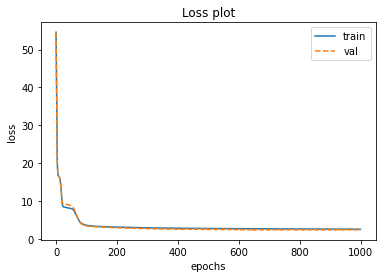

time: 297 ms (started: 2021-01-23 18:19:21 +01:00)


In [14]:
plot_loss(history)

(0.0, 500.0)

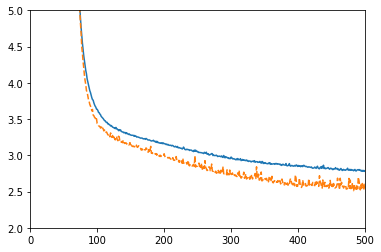

time: 234 ms (started: 2021-01-23 18:19:21 +01:00)


In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')
plt.ylim(2,5)
plt.xlim(0,500)

In [16]:
prova = model.predict(X_val)

time: 109 ms (started: 2021-01-23 18:19:21 +01:00)


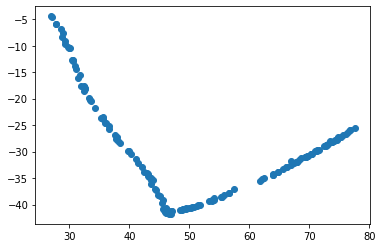

time: 218 ms (started: 2021-01-23 18:19:21 +01:00)


In [17]:
x1 = prova[:,0]
y1 = prova[:,1]
plt.scatter(x1, y1)

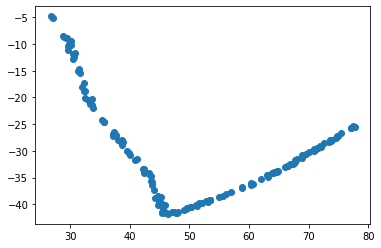

time: 219 ms (started: 2021-01-23 18:19:21 +01:00)


In [18]:
x_real = y_val[:,0]
y_real = y_val[:,1]
plt.scatter(x_real, y_real)